In [5]:
# 1. Import Libraries
# Importing necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
# 2. Load Data
# Loading the dataset
data = pd.read_csv("C:/Users/Admin/Desktop/DataSets/data.csv")

In [10]:
# 3. Exploratory Data Analysis (EDA)
 # Display the shape of the dataset
print("Shape of data:", data.shape) 

Shape of data: (16857, 29)


In [11]:
# Display the first few rows to understand data structure
data.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


In [12]:
# Display data types and missing value information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [55]:
# Statistical summary of the dataset
data.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,...,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000,16857.000000
mean,11.952067,7.460165,78.688853,545.767812,125.047399,39.535636,21.670575,38.211662,20.242346,37.952298,...,18.852870,40.320577,6.208130,755.779700,79.223550,4.186361,38.531744,2.781865,24.855569,25.081094
std,17.241658,1.669748,69.692635,476.522137,147.667455,9.867143,2.531931,9.876752,2.714872,10.517395,...,2.470132,10.870511,7.371999,13.298803,27.902210,4.300266,20.799517,5.943530,25.564582,24.892020
min,0.000000,0.000000,0.000000,0.000000,0.000000,-77.265503,6.543921,-71.406273,4.613485,-81.446225,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,1.000000,8.000000,24.000000,192.000000,29.000000,37.933333,20.600000,36.754000,19.292500,35.290000,...,17.890000,38.363333,3.166667,751.100000,72.000000,2.000000,29.000000,0.583333,12.808011,12.805830
50%,7.000000,8.000000,54.000000,397.000000,80.000000,40.293333,21.767500,38.400000,20.290000,38.090000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,17.000000,8.000000,126.000000,713.000000,156.000000,42.790000,22.700000,41.000000,21.290000,41.230000,...,20.100000,43.500000,9.050000,761.733333,91.500000,5.666667,40.000000,5.150000,37.242702,37.277176
max,128.000000,18.000000,431.000000,2170.000000,836.000000,77.265503,36.823982,71.406273,35.921144,81.446225,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [14]:
# Check for missing values in the dataset
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_var

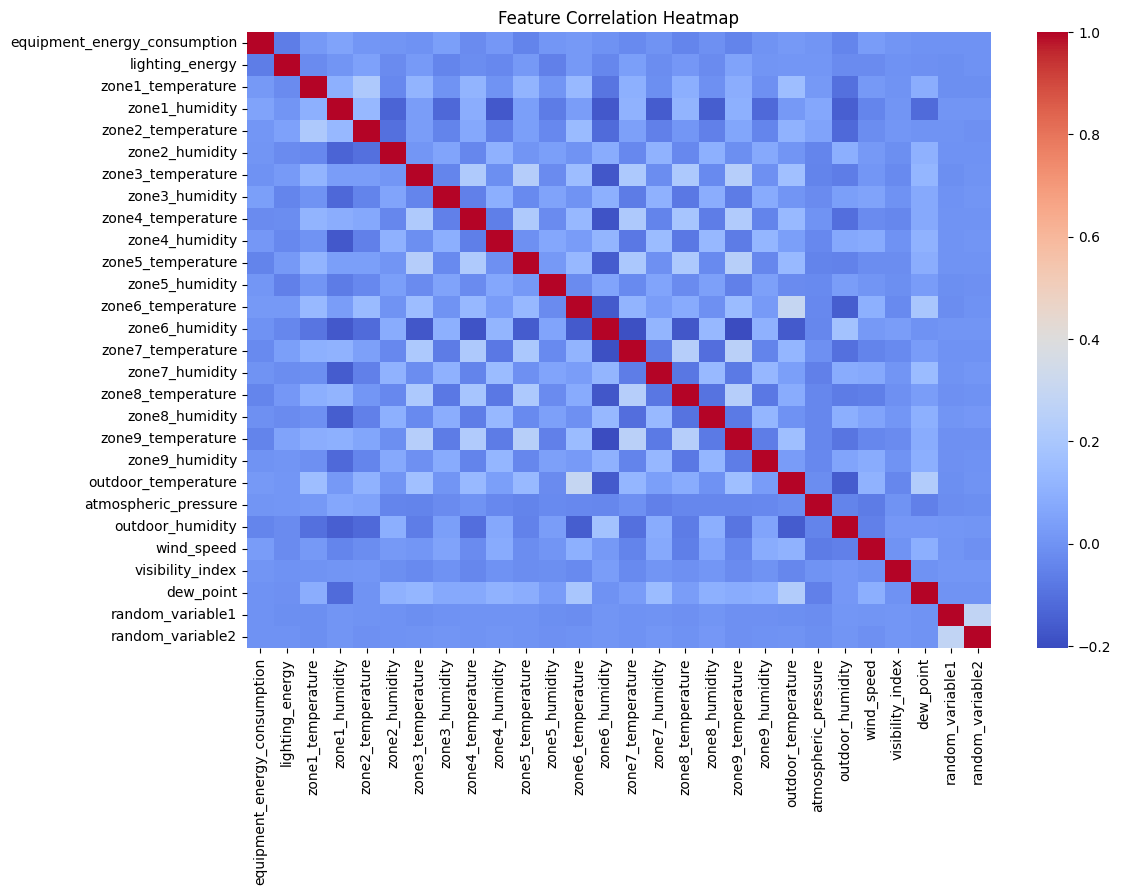

In [56]:
# Plotting a heatmap to visualize correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

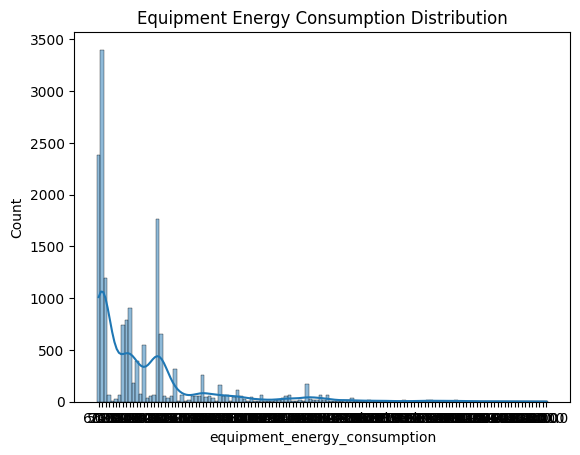

In [16]:
# Visualize the distribution of the target variable
sns.histplot(data['equipment_energy_consumption'], kde=True)
plt.title('Equipment Energy Consumption Distribution')
plt.show()

In [43]:
# 4. Data Preprocessing

# Impute missing values: numerical columns with median, categorical (if any) with mode
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Drop the timestamp column (non-numeric feature)
if 'timestamp' in data.columns:
    data = data.drop('timestamp', axis=1)

for col in data.columns:
    if data[col].dtype == 'object':
        # Replace 'unknown' or any text with a special value or encode properly
        data[col] = data[col].replace('unknown', np.nan)
        data[col].fillna(data[col].mode()[0], inplace=True)
        data[col] = pd.factorize(data[col])[0]

In [44]:
# Separate features and target variable
y = data['equipment_energy_consumption']
X = data.drop('equipment_energy_consumption', axis=1)

In [45]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# 5. Model Development
# Instantiate a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

In [47]:
# Train the model using the training data
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [48]:
# 6. Model Evaluation
# Predict on the test set
y_pred = rf.predict(X_test)

In [49]:
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [50]:
# Print model performance
print(f"\nModel Performance:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


Model Performance:
MAE: 10.96
MSE: 268.51
RMSE: 16.39
R2 Score: 0.13


In [51]:
# Plot feature importances
importances = rf.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

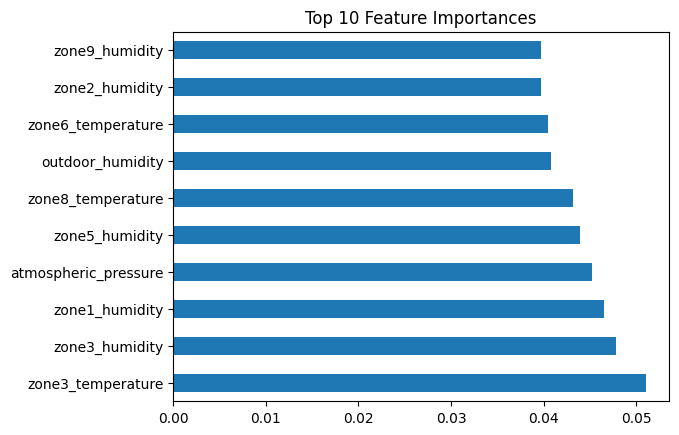

In [52]:
# Visualize the top 10 most important features
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

In [53]:
# 7. Key Findings & Recommendations
# Print key insights based on the analysis
print("\nKey Insights:")
print("- Environmental factors such as temperature, humidity, or specific sensor zones have significant impacts.")
print("- Managing these environmental parameters could reduce energy usage.")


Key Insights:
- Environmental factors such as temperature, humidity, or specific sensor zones have significant impacts.
- Managing these environmental parameters could reduce energy usage.


In [54]:
# Provide recommendations for energy consumption reduction
print("\nRecommendations:")
print("1. Optimize conditions in the most energy-impactful zones.")
print("2. Regularly monitor top influencing sensors.")
print("3. Implement predictive maintenance to reduce inefficiencies.")


Recommendations:
1. Optimize conditions in the most energy-impactful zones.
2. Regularly monitor top influencing sensors.
3. Implement predictive maintenance to reduce inefficiencies.
